In [6]:
import skimage.io as io

## Evaluation with Cell Tracking Challenge Matrices

The Cell Tracking Challenge (CTC) matrices objectively evaluate segmentation and tracking performance of an algorithm. Alghtough not designed for scoring cell cycle profiling, we can forget cell cycle phases for the time being, and feed our results to CTC evaluation software.

File format readable by CTC evaluation software should be in the structure of:

|---001  
|---001_GT  
|---001_RES  

 where some dataset is labeled with 001. Raw image stored in 001 folder, ground truth in 001_GT, and result in 001_RES.  
See CTC official descriptions for image format and detailed naming conventions.

pcnaDeep package offers the class __pcna_ctcEvaluator__ and a few APIs for transfering __raw image__, __standard output__ (multipage .tif mask and track .csv table), and deepcell_caliban-curated __ground truth__ to CTC-readable format. 

### Initialize pcnaDeep.pcna_ctcEvaluator

In [1]:
from pcnaDeep.evaluate import pcna_ctcEvaluator

The class is initialized with these parameters:
- root  
    &emsp;Directory to the folder where you wish to store all informations in CTC format.
- dt_id  
    &emsp;ID of dataset
- digit_num:  
    &emsp;Digit count of id (e.g. 001 should corresponding to digit_num=3)
- t_base  
    &emsp;Time for naming the first frame, defult is 0.
    
We will create a new folder under '/examples' to store this toy dataset named with 0001. The is done when the class is initialized.

In [5]:
ev = pcna_ctcEvaluator(root='../examples/CTC', dt_id=1, digit_num=4, t_base=0)

### &emsp;Dataset
The example dataset is a 66-frame RPE1 cell image stack which has 2 mitosis events and xxx cell tracks.

In [9]:
stack = io.imread('../examples/RPE_20200729_s2_cpd.tif')
stack.shape

(65, 1200, 1200, 3)

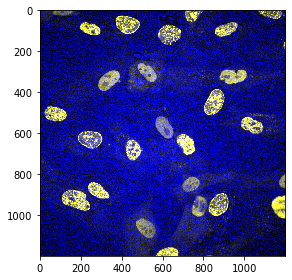

In [10]:
io.imshow(stack[0,:])

### 1. Convert raw .tif stack to CTC format
The method generate_raw(stack) takes in a multipage stack (THWC format) and save it to corresponding folder.

In [ ]:
ev.generate_raw(stack)

### 2. Convert pcnaDeep output to CTC RES format